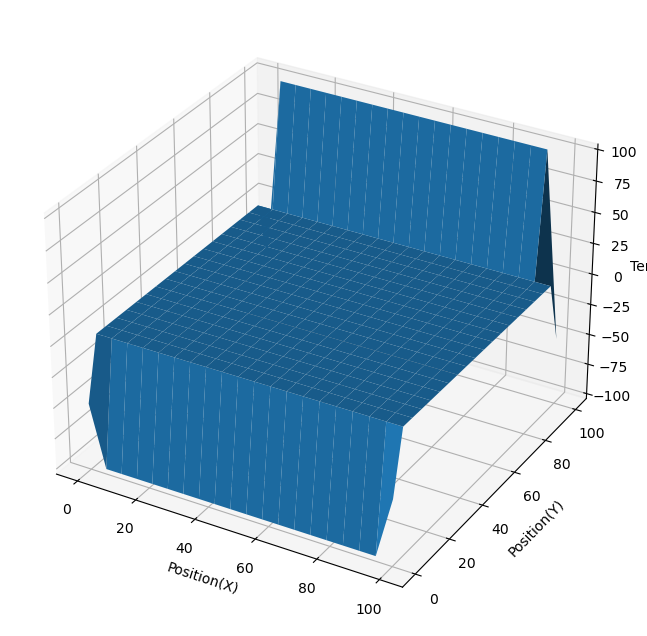

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
L = 100 # Plate side length
segments = 20 # Number of segments
dx = dy = L / (segments - 1) # Grid increment
dt = 0.01 # Time step (adjust as needed)

# Create grid
x = np.linspace(0, L, segments)
y = np.linspace(0, L, segments)
X, Y = np.meshgrid(x, y)

# Initial conditions
T = np.zeros_like(X)
T[:, 0] = 0 # T(x=0) = 0
T[:, -1] = 0 # T(x=L) = 0
T[0, :] = -100 # T(y=0) = -100
T[-1, :] = 100 # T(y=L) = 100
T[0, 0] = T[0, -1] = T[-1, 0] = T[-1, -1] = (T[0, 1] + T[1, 0]) / 2 # Corner points

# Crank-Nicolson method
alpha = 0.5 * dt / dx**2
beta = 0.5 * dt / dy**2

for _ in range(1000): 
    Tn = T.copy()
    for i in range(1, segments - 1):
        for j in range(1, segments - 1):
            T[i, j] = alpha * (Tn[i + 1, j] - 2 * Tn[i, j] + Tn[i - 1, j]) + beta * (Tn[i, j + 1] - 2 * Tn[i, j] + Tn[i, j - 1])
            T[i, j] /= 1 + 2 * (alpha + beta)

# Surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, T)

ax.set_xlabel('Position(X)')
ax.set_ylabel('Position(Y)')
ax.set_zlabel('Temp')


# Show plot
plt.show()






In [2]:
#     import numpy as np  
#     na, nb = (5, 3)  
#     a = np.linspace(1, 2, na)  
#     b = np.linspace(1, 2, nb)  
#     xa, xb = np.meshgrid(a, b)  
#     xa  
#     xb  
#     array([[1.  , 1.25, 1.5 , 1.75, 2.  ],
#        	[1.  , 1.25, 1.5 , 1.75, 2.  ],
#        	[1.  , 1.25, 1.5 , 1.75, 2.  ]])
# array([[1. , 1. , 1. , 1. , 1. ],
#        	[1.5, 1.5, 1.5, 1.5, 1.5],
#        	[2. , 2. , 2. , 2. , 2. ]])

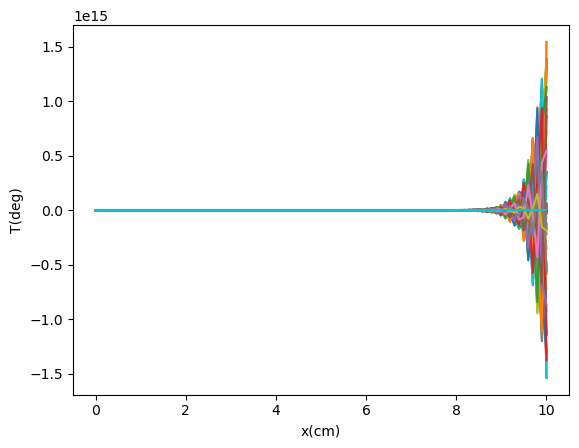

In [16]:
a=0.7
row=100
col=100

u=np.zeros((row,col))
u[:][0]=0
for i in range(col):
    u[i][0]=100
for j in range (col):
    u[j][99]=50
for j in range (1,col):
    for i in range (1,row-1):
        u[i][j]=u[i][j-1]+a*(u[i+1][j-1]- (2*u[i][j-1] +u[i-1][j-1]))
x=np.linspace(0,10,100)
for k in range (col):
    plt.plot(x,u[:][k],label=f"t={k}")
plt.xlabel('x(cm)')
plt.ylabel('T(deg)')

plt.show()

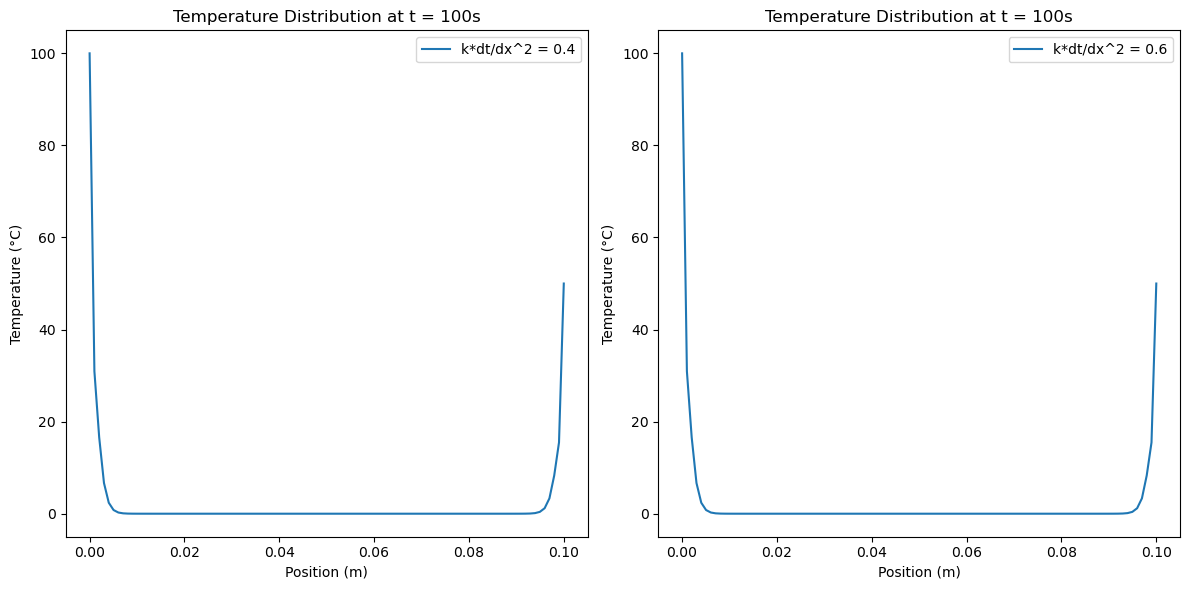

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
L = 0.1  # Length of the rod in meters (10 cm converted to meters)
T_initial = 0.0  # Initial temperature
T_hot = 100.0  # Temperature at the left end (hot reservoir)
T_cold = 50.0  # Temperature at the right end (cold reservoir)
k_values = [0.4, 0.6]  # Values of k*dt/dx^2

# Discretization parameters
Nx = 100  # Number of spatial points
Nt = 100  # Number of time steps
dx = L / (Nx - 1)  # Spatial step
dt_values = [k * dx**2 for k in k_values]  # Time step for each k value

# Initialize grid
x = np.linspace(0, L, Nx)
t = np.linspace(0, 100, Nt)
u = np.zeros((Nx, Nt))

# Initial condition
u[:, 0] = T_initial

# Boundary conditions
u[0, :] = T_hot
u[-1, :] = T_cold

# Implicit method using Crank-Nicolson
for k, dt in zip(k_values, dt_values):
    alpha = k * dt / dx**2

    # Construct tridiagonal matrix A
    A = np.diag(1 + 2 * alpha * np.ones(Nx - 2)) - alpha * np.diag(np.ones(Nx - 3), -1) - alpha * np.diag(
        np.ones(Nx - 3), 1)

    for n in range(1, Nt):
        # Right-hand side vector
        b = u[1:Nx - 1, n - 1] + alpha * (u[0:Nx - 2, n] - 2 * u[1:Nx - 1, n - 1] + u[2:Nx, n])

        # Solve the system of equations using numpy's linear algebra solver
        u[1:Nx - 1, n] = np.linalg.solve(A, b)

# Plot the result
plt.figure(figsize=(12, 6))

for i, k in enumerate(k_values):
    plt.subplot(1, len(k_values), i + 1)
    plt.plot(x, u[:, -1], label=f'k*dt/dx^2 = {k}')
    plt.title('Temperature Distribution at t = 100s')
    plt.xlabel('Position (m)')
    plt.ylabel('Temperature (°C)')
    plt.legend()

plt.tight_layout()
plt.show()


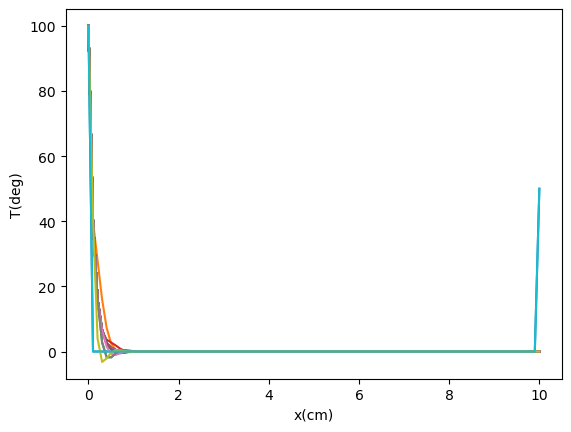

In [12]:
a=0.3
row=100
col=100

u=np.zeros((row,col))
u[:][0]=0
for i in range(col):
    u[i][0]=100
for j in range (col):
    u[j][99]=50
for j in range (1,col):
    for i in range (1,row-1):
        u[i][j]=u[i][j-1]+a*(u[i+1][j-1]- (2*u[i][j-1] +u[i-1][j-1]))
x=np.linspace(0,10,100)
for k in range (col):
    plt.plot(x,u[:][k],label=f"t={k}")
plt.xlabel('x(cm)')
plt.ylabel('T(deg)')

plt.show()

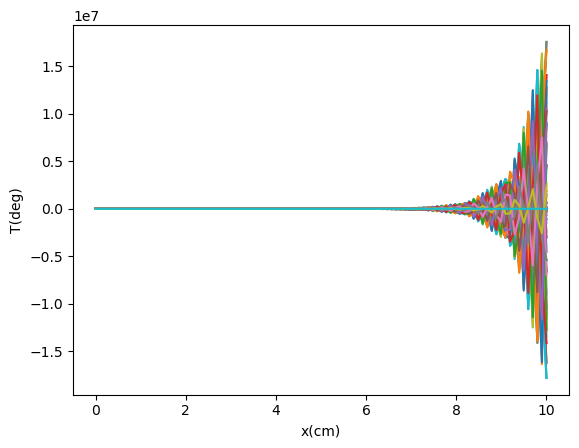

In [7]:
a=0.6
row=100
col=100

u=np.zeros((row,col))
u[:][0]=0
for i in range(col):
    u[i][0]=100
for j in range (col):
    u[j][99]=50
for j in range (1,col):
    for i in range (1,row-1):
        u[i][j]=u[i][j-1]+a*(u[i+1][j-1]- (2*u[i][j-1] +u[i-1][j-1]))
x=np.linspace(0,10,100)
for k in range (col):
    plt.plot(x,u[:][k],label=f"t={k}")
plt.xlabel('x(cm)')
plt.ylabel('T(deg)')

plt.show()